In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(777)
torch.manual_seed(777)

training_epochs = 15
batch_size = 100

device = torch.device("cpu")

MNIST DATA LOAD
MNIST 데이터를 불러온다

In [9]:
mnist_train = dsets.MNIST(root='/tmp/pycharm_project_001/MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='/tmp/pycharm_project_001/MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

Create fully connected layer / Linear Module로 layer을 정의

input size = 784 / output size = 10

torch.nn.Linear : Applies a linear transformation to the incoming data $ y = x A^{T} + b $ 

Set Optimizer to SGD / Optimzer를 SGD로 설정

Set error function to Cross entropy / 오차 함수를 Cross entropy 오차 함수로 설정


In [4]:
linear = nn.Linear(784, 10, bias=True).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

optimizer.zero_grad() / 역전파 단계 실행 전 경사도를 0으로 변환

cost = criterion(hypothesis, Y) / 오차(cost)는 hypothesis와 Y값의 Cross-entropy Loss

cost.backward() / Calculate through Back propagation, 역전파를 통해 계산

optimizer.step() / Performs a single opimization step. 최적화 단계 1회 실행

cost가 점점 줄어드는 것을 확인할 수 있다.

In [5]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learing finished')

Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274209
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578060
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180733
Epoch: 0007 cost = 0.295130223
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417054
Epoch: 0010 cost = 0.284379572
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277808964
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440855
Learing finished


Accuracy:  0.8863000273704529
Label :  7
Prediction :  7


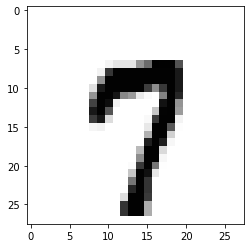

In [8]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy: ', accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label : ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction : ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
